<a href="https://colab.research.google.com/github/KenKaneki2207/Pizza_Steak_Image_Classification/blob/main/Pizza_Steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

In [4]:
pip install opendatasets

In [5]:
import opendatasets as op
import os

Opendatasets is used to download the datasets from kaggle and drive.
 [How to download dataset from kaggle? ](https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/)

In [6]:
op.download('https://www.kaggle.com/datasets/kelixirr/pizza-steak-image-classification-dataset/data')
# username = ganeshgaikwad1
# key = 7cac5185e3473ee183582102b365a43d

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ganeshgaikwad1
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kelixirr/pizza-steak-image-classification-dataset


100%|██████████| 104M/104M [00:01<00:00, 103MB/s]  


In [7]:
path = '/content/pizza-steak-image-classification-dataset/pizza_steak'

In [8]:
# check the directory
for root,dirs, files in os.walk(path):
  print(f"There are {len(dirs)} directories, {len(files)} files in {root}")

There are 2 directories, 0 files in /content/pizza-steak-image-classification-dataset/pizza_steak
There are 2 directories, 0 files in /content/pizza-steak-image-classification-dataset/pizza_steak/test
There are 0 directories, 250 files in /content/pizza-steak-image-classification-dataset/pizza_steak/test/pizza
There are 0 directories, 250 files in /content/pizza-steak-image-classification-dataset/pizza_steak/test/steak
There are 2 directories, 0 files in /content/pizza-steak-image-classification-dataset/pizza_steak/train
There are 0 directories, 750 files in /content/pizza-steak-image-classification-dataset/pizza_steak/train/pizza
There are 0 directories, 750 files in /content/pizza-steak-image-classification-dataset/pizza_steak/train/steak


# Data Visualization

In [9]:
# Libraires
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

In [10]:
# function to display random images from the training dataset
def random_images(food):
  path = '/content/pizza-steak-image-classification-dataset/pizza_steak'
  if food == 'pizza':
    path = f"{path}/train/pizza"
  elif food == 'steak':
    path = f"{path}/train/steak"
  else:
    print('Enter steak or pizza')
    return

  # Taking any random image from the directory
  sample = random.sample(os.listdir(path), 1)

  # displaying that random image
  sample_img = imread(f"{path}/{sample[0]}")
  plt.imshow(sample_img)
  plt.axis('off')
  plt.title(food)

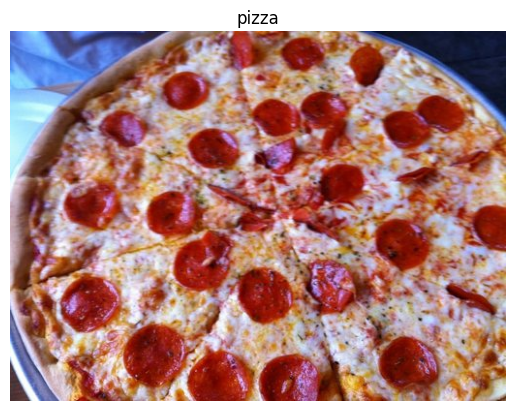

In [11]:
random_images('pizza')

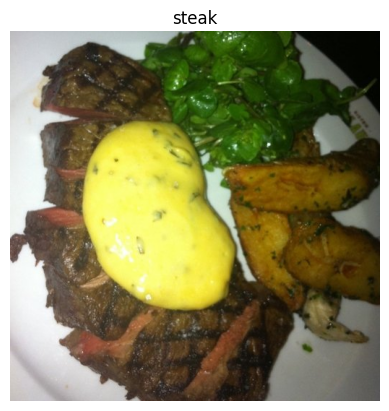

In [12]:
random_images('steak')

# Data Preprocessing

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalize the data (convert it into the range of 0 to 1)
datagen = ImageDataGenerator(rescale=1./255.0)

# Splitting the dataset

In [14]:
train_dir = f"{path}/train"
test_dir = f"{path}/test"

train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='binary',
    shuffle=False,
)

test_ds = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode = 'binary',
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Model 1

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [16]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

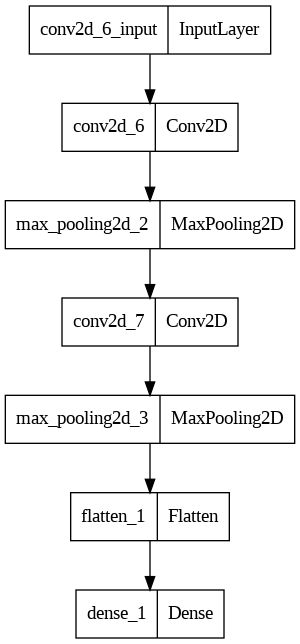

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model_1)

In [27]:
history_1 = model_1.fit(train_ds,
                        epochs=10,
                        # steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        # validation_steps=len(test_ds)
                        )

Epoch 1/10
47/47 [==============================] - 45s 947ms/step - loss: 0.3505 - accuracy: 0.8733 - val_loss: 0.4379 - val_accuracy: 0.7820
Epoch 2/10
47/47 [==============================] - 44s 934ms/step - loss: 0.2542 - accuracy: 0.9113 - val_loss: 0.4161 - val_accuracy: 0.8260
Epoch 3/10
47/47 [==============================] - 44s 933ms/step - loss: 0.2247 - accuracy: 0.9227 - val_loss: 0.4020 - val_accuracy: 0.8280
Epoch 4/10
47/47 [==============================] - 44s 942ms/step - loss: 0.1984 - accuracy: 0.9313 - val_loss: 0.4109 - val_accuracy: 0.8320
Epoch 5/10
47/47 [==============================] - 48s 1s/step - loss: 0.1986 - accuracy: 0.9273 - val_loss: 0.4194 - val_accuracy: 0.8040
Epoch 6/10
47/47 [==============================] - 50s 1s/step - loss: 0.1363 - accuracy: 0.9687 - val_loss: 0.5092 - val_accuracy: 0.8020
Epoch 7/10
47/47 [==============================] - 44s 944ms/step - loss: 0.1141 - accuracy: 0.9713 - val_loss: 0.4518 - val_accuracy: 0.8020
Epoch

In [28]:
model_1.evaluate(test_ds)

16/16 [==============================] - 6s 321ms/step - loss: 0.6801 - accuracy: 0.7420


[0.6800881624221802, 0.7419999837875366]

## Plot Curve

In [21]:
import pandas as pd
def plot_curve(history):
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']

  train_acc = history.history['accuracy']
  valid_acc = history.history['val_accuracy']

  plt.plot(train_loss, label='train_loss')
  plt.plot(valid_loss, label='valid_loss')
  plt.legend()

  plt.figure();
  plt.plot(train_acc, c='g', label='train_accuracy')
  plt.plot(valid_acc, c='r', label='valid_accuracy')
  plt.legend()

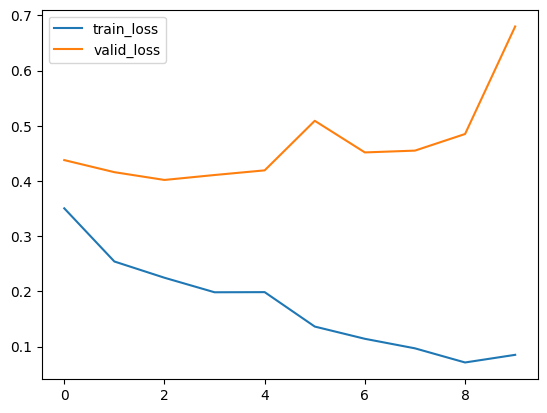

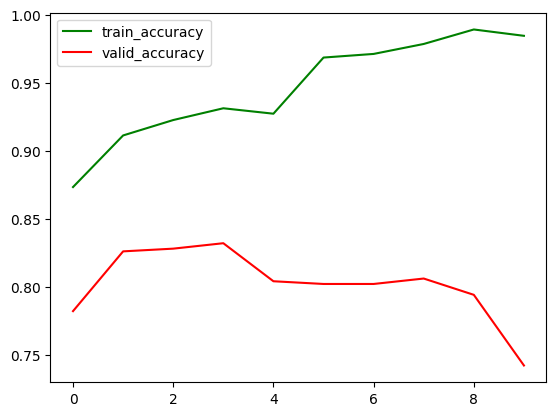

In [30]:
plot_curve(history_1)

# Model_2 More Kernel Layers

In [33]:
augmentation = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  )

In [35]:
tf.random.set_seed(42)

train_ds_augmented = augmentation.flow_from_directory(train_dir,
                                                      target_size=(224, 224),
                                                      seed=42,
                                                      class_mode='binary',
                                                      )

test_ds_augmented = augmentation.flow_from_directory(test_dir,
                                                      target_size=(224, 224),
                                                      seed=42,
                                                      class_mode='binary',
                                                      )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_2 = Sequential([
    Conv2D(15, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(15, 3, activation='relu'),
    Conv2D(15, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [37]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 15)      420       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 15)      2040      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 15)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 15)      2040      
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 15)      2040      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 15)        0         
 g2D)                                                 

In [39]:
history_2 = model_2.fit(train_ds_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_ds_augmented),
                        validation_data=test_ds_augmented,
                        validation_steps=len(test_ds_augmented)
                        )

Epoch 1/10
47/47 [==============================] - 21s 449ms/step - loss: 0.6118 - accuracy: 0.6693 - val_loss: 0.4087 - val_accuracy: 0.8180
Epoch 2/10
47/47 [==============================] - 22s 459ms/step - loss: 0.5287 - accuracy: 0.7353 - val_loss: 0.4190 - val_accuracy: 0.8240
Epoch 3/10
47/47 [==============================] - 23s 492ms/step - loss: 0.4876 - accuracy: 0.7740 - val_loss: 0.4744 - val_accuracy: 0.7620
Epoch 4/10
47/47 [==============================] - 22s 469ms/step - loss: 0.5039 - accuracy: 0.7680 - val_loss: 0.3629 - val_accuracy: 0.8400
Epoch 5/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4716 - accuracy: 0.7913 - val_loss: 0.3272 - val_accuracy: 0.8560
Epoch 6/10
47/47 [==============================] - 22s 466ms/step - loss: 0.4409 - accuracy: 0.7993 - val_loss: 0.3078 - val_accuracy: 0.8860
Epoch 7/10
47/47 [==============================] - 22s 466ms/step - loss: 0.4179 - accuracy: 0.8153 - val_loss: 0.3451 - val_accuracy: 0.8580

In [40]:
model_2.evaluate(test_ds)

16/16 [==============================] - 1s 85ms/step - loss: 0.3202 - accuracy: 0.8780


[0.3201998472213745, 0.878000020980835]

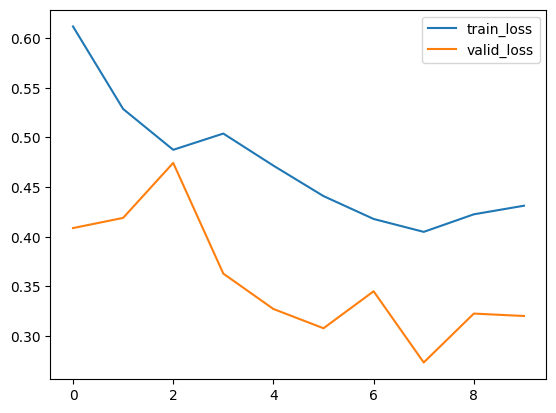

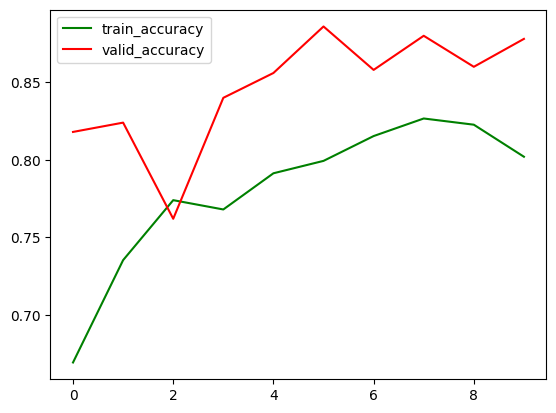

In [41]:
plot_curve(history_2)